# Linear Regression 
* Linear regression is not a new concept and has been around the talk of mathematicians for ages. Here are a few historical events regarding linear regression: 
    * 1722 - Roger Cotes discovers combining different observations yields better estimates of the true value. 
    * 1750 - Tobias Mayer explores averaging different results under similar conditions in studying liberations of the moon. 
    * 1757 - Roger Joseph Boscovich further develops combining observations studying the shape of the Earth. 
    * 1788 - Pierre-Simon LaPlace develops similar averaging theories in explaining the difference between Jupiter and Saturn. 
    * 1805 - First public exposition on Linear Regression with least squares methods published by Adrien-Marie Legendre-Nouvelles Metheodes pour La Detemination des Orbites des Cometes. 
    * 1809 - Carl Friedrich Gauss publishes his methods of calculating orbits of celestial bodies, and claimed to have invented least-squares back in 1795. 
* A linear relationship implies some constant straight-line relationship. The simplest possible is y = x. 
* It would have been great if in real life we can get data that can fit within the same line or have one-to-one relationship. But often time we get data that are scattered around the plot and we have to find the best solution to find the best relation between x and y. To draw a perfect line that can fit all the data, we should try to minimize the distance from each data point to the line. In simple terms, the distance from the line to the data points is the residual error, and we want to minimize these errors. 

## Ordinary Least Squares: 
* One method to minimize the errors is to use ordinary least squares. Ordinary least squares work by minimizing the sum of the squares of the differences between the observed dependent variable (value of the variable being observed) in the given dataset and those predicted by the linear function. 
* Having a squared error will help us simplify calculations when setting up derivatives. 
* The simple equation for the linear straight line is y = mx + c, where y is the dependent variable, x is the independent variable, m is the slope of the line and c is the constant or distance from the origin to the intersection to the y-axis. 
    * The equation y = mx + c allows us to use only one dependent and one independent variable to analyze our data and make our predictions. 
    

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("data/Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
df['total_spend'] = df.TV + df.newspaper + df.radio
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


<Axes: xlabel='total_spend', ylabel='sales'>

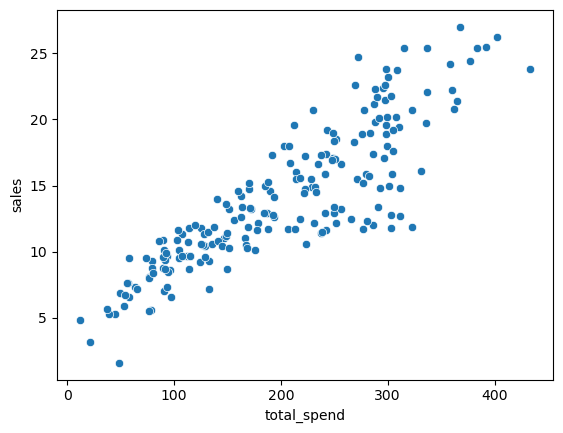

In [4]:
sns.scatterplot(data=df, x='total_spend', y='sales')

<Axes: xlabel='total_spend', ylabel='sales'>

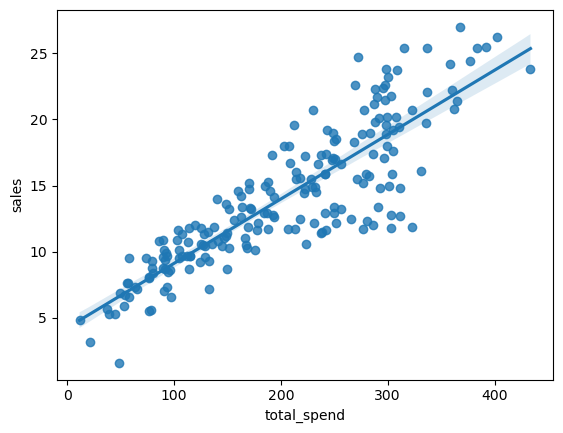

In [5]:
sns.regplot(data=df, x='total_spend', y='sales')

In [6]:
X = df['total_spend']
y = df['sales']

In [11]:
"""
We can create a best-fit line using an inbuilt numpy method called polyfit
to get a best-fit line which returns the equation y = B1x + B0
The function takes two arguments X and y, and returns an array with coefficient 
B1 and constant B0.
"""
advertisement_coeff = np.polyfit(X, y, deg=1)

In [9]:
np.polyfit(X, y, deg=1)[0]

0.04868787931904817

In [14]:
# We can create a plot of the regression line to get better understanding
# the regression line is generated. 
potential_spending = np.linspace(0, 500, 100)
predicted_sales = potential_spending * advertisement_coeff[0] + advertisement_coeff[1]

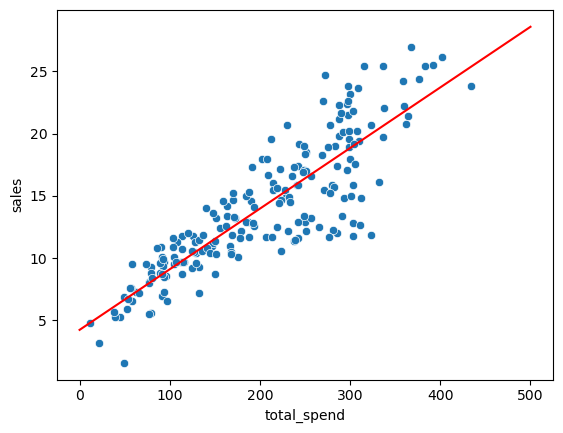

In [16]:
# Here the predicted sales line is plotted over the original data's regression line
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(potential_spending, predicted_sales, color = 'red')

In [17]:
""" 
Using the regression line equation we have just created we can predict the potential
sales based on the advertisement spending. Here is how we can achieve that. 
"""
spending = 200
predicted_sale = advertisement_coeff[0] * spending + advertisement_coeff[1]
predicted_sale

13.98060407984596

In [18]:
""" 
We can create a different regression line (models) for our predictions such
if we change our polynomial degree to different values. 
"""
adv_coef_three = np.polyfit(X, y, deg=3)
adv_coef_three

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [24]:
predicted_sales_three = (potential_spending**3 * adv_coef_three[0] + 
                        potential_spending**2 * adv_coef_three[1] +
                        potential_spending * adv_coef_three[2]+
                        adv_coef_three[3])
predicted_sales_three

array([ 2.70495053,  3.11474825,  3.51512185,  3.90630911,  4.28854779,
        4.66207567,  5.02713052,  5.38395012,  5.73277224,  6.07383465,
        6.40737513,  6.73363145,  7.05284138,  7.3652427 ,  7.67107317,
        7.97057058,  8.2639727 ,  8.5515173 ,  8.83344215,  9.10998502,
        9.3813837 ,  9.64787595,  9.90969955, 10.16709227, 10.42029188,
       10.66953616, 10.91506287, 11.15710981, 11.39591473, 11.63171541,
       11.86474962, 12.09525514, 12.32346974, 12.5496312 , 12.77397728,
       12.99674577, 13.21817442, 13.43850103, 13.65796336, 13.87679918,
       14.09524627, 14.3135424 , 14.53192534, 14.75063288, 14.96990277,
       15.1899728 , 15.41108073, 15.63346435, 15.85736142, 16.08300973,
       16.31064703, 16.54051111, 16.77283973, 17.00787068, 17.24584172,
       17.48699063, 17.73155518, 17.97977315, 18.23188231, 18.48812043,
       18.74872528, 19.01393464, 19.28398629, 19.55911799, 19.83956752,
       20.12557265, 20.41737116, 20.71520081, 21.01929939, 21.32

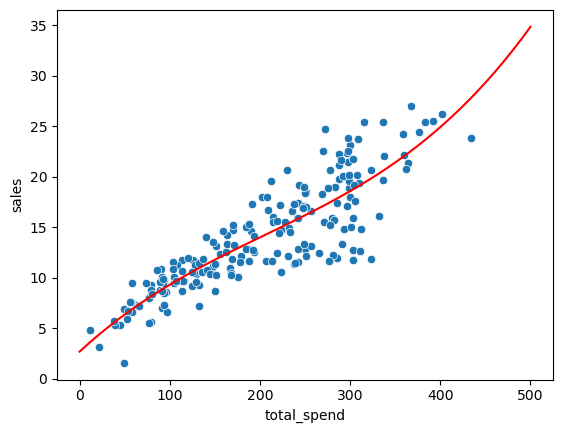

In [25]:
sns.scatterplot(x='total_spend', y='sales', data=df)
plt.plot(potential_spending, predicted_sales_three, color='red')

## Scikit-learn
* We have seen that we can deploy different models to analyze and predict the values for dependent variable, but it would be nice to know if we can create model for each independent variable such radio, tv and newspaper. To do that we can use library called scikit-learn. It allows us to create a different models and let us compare its effectiveness using it's built in functionality.
* Numpy has some built in capabilities for simpler linear regression, but when it comes to more complex models, we'll need scikit-learn.  
* Scikit-learn is a library containing many machine learning algorithms. It utilize a generalized "estimator API" framework to calling the models. This means the way algorithms are imported, fitted, and used is uniform across all algorithms. 
* This allows users to easily swap algorithms in and out and test various approaches. 
* scikit-learn also comes with many convenience tools, including train test split functions, cross validation tools, and a variety of reporting metric functions. This makes scikit-learn a one-stop-shop for machine learning.
 